# PART-B: Forecasting model using a time-series analysis algorithm 

### Forecasting model using a time-series analysis algorithm that will forecast the total sales revenue across all stores and items for the next 7 days

**Experiment on forecasting using ARIMA**

**Ask of the experiment:** 

In this assignment, we will be working on a forecasting problem using ARIMA Algorithm. Develop a forecasting model using ARIMA that predicts the sales for 10 stores for all items for the next 7 days.

The metric for assessment model performance is RSME/MAPE score.
The steps are:
1.   Load and explore dataset
2.   Data Cleaning
3.   Training Gradient Boosting Classifier model
4.   Evaluation score.

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import joblib
from joblib import dump

### 2. Loading and Exploring required datasets

In [2]:
calendar_events = pd.read_csv('../../data/raw/calendar_events.csv',low_memory=False)

In [3]:
calendar = pd.read_csv('../../data/raw/calendar.csv',low_memory=False)

In [4]:
items_weekly_sell_prices = pd.read_csv('../../data/raw/items_weekly_sell_prices.csv',low_memory=False)

In [5]:
sales_train = pd.read_csv('../../data/raw/sales_train.csv',low_memory=False)

In [6]:
calendar_events

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious
...,...,...,...
162,2016-05-30,MemorialDay,National
163,2016-06-02,NBAFinalsStart,Sporting
164,2016-06-07,Ramadan starts,Religious
165,2016-06-19,Father's day,Cultural


In [7]:
calendar

,date,wm_yr_wk,d
0,2011-01-29,11101,d_1
1,2011-01-30,11101,d_2
2,2011-01-31,11101,d_3
3,2011-02-01,11101,d_4
4,2011-02-02,11101,d_5
...,...,...,...
1964,2016-06-15,11620,d_1965
1965,2016-06-16,11620,d_1966
1966,2016-06-17,11620,d_1967
1967,2016-06-18,11621,d_1968


In [8]:
items_weekly_sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [9]:
sales_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,2,0,0,0,1,0,0,0,2
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,1,0,3,2,1,1,0,1,3,0
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Melt the DataFrame to reshape it
sales_train_pivoted = pd.melt(sales_train, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                    var_name='day', value_name='item_sales')

In [11]:
sales_train_pivoted

,id,item_id,dept_id,cat_id,store_id,state_id,day,item_sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
46985085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2
46985086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0
46985087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0
46985088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0


In [12]:
# Merge the two DataFrames based on the 'day' and 'd' columns
merged_df = sales_train_pivoted.merge(calendar[['d', 'date', 'wm_yr_wk']], left_on='day', right_on='d', how='left')
merged_df = merged_df.merge(calendar_events[['date', 'event_name', 'event_type']], on='date', how='left')
merged_df = merged_df.merge(items_weekly_sell_prices[['store_id', 'item_id', 'wm_yr_wk', 'sell_price']], 
                            on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

# Drop the 'd' column as it's no longer needed
merged_df.drop(columns=['d'], inplace=True)

In [13]:
merged_df

,id,item_id,dept_id,cat_id,store_id,state_id,day,item_sales,date,wm_yr_wk,event_name,event_type,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47107045,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2,2015-04-18,11512,NaN,NaN,2.88
47107046,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,NaN,NaN,2.00
47107047,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,NaN,NaN,3.98
47107048,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,NaN,NaN,1.28


In [14]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
item_sales,47107050.0,1.087059,3.934360,0.00,0.00,0.00,1.00,763.00
wm_yr_wk,47107050.0,11288.536570,120.742307,11101.00,11204.00,11307.00,11409.00,11512.00
sell_price,34815174.0,4.383812,3.358256,0.01,2.08,3.44,5.84,107.32


In [15]:
merged_df['sell_price'].fillna(0, inplace=True)
merged_df['revenue'] = merged_df['item_sales']*merged_df['sell_price']
merged_df['revenue'].fillna(0, inplace=True)

In [16]:
merged_df

,id,item_id,dept_id,cat_id,store_id,state_id,day,item_sales,date,wm_yr_wk,event_name,event_type,sell_price,revenue
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0.00,0.00
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0.00,0.00
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0.00,0.00
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0.00,0.00
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47107045,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1541,2,2015-04-18,11512,NaN,NaN,2.88,5.76
47107046,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,NaN,NaN,2.00,0.00
47107047,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,NaN,NaN,3.98,0.00
47107048,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1541,0,2015-04-18,11512,NaN,NaN,1.28,0.00


In [17]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [18]:
final_df = merged_df[['date','revenue']]

In [19]:
final_df

,date,revenue
0,2011-01-29,0.00
1,2011-01-29,0.00
2,2011-01-29,0.00
3,2011-01-29,0.00
4,2011-01-29,0.00
...,...,...
47107045,2015-04-18,5.76
47107046,2015-04-18,0.00
47107047,2015-04-18,0.00
47107048,2015-04-18,0.00


In [20]:
# Group by 'date' and calculate the sum of 'revenue'
daily_revenue = final_df.groupby('date')['revenue'].sum().reset_index()

# The resulting 'daily_revenue' DataFrame will contain two columns: 'date' and 'revenue'
daily_revenue

,date,revenue
0,2011-01-29,81650.61
1,2011-01-30,78970.57
2,2011-01-31,57706.91
3,2011-02-01,60761.20
4,2011-02-02,46959.95
...,...,...
1536,2015-04-14,102896.92
1537,2015-04-15,106913.88
1538,2015-04-16,98373.49
1539,2015-04-17,103030.58


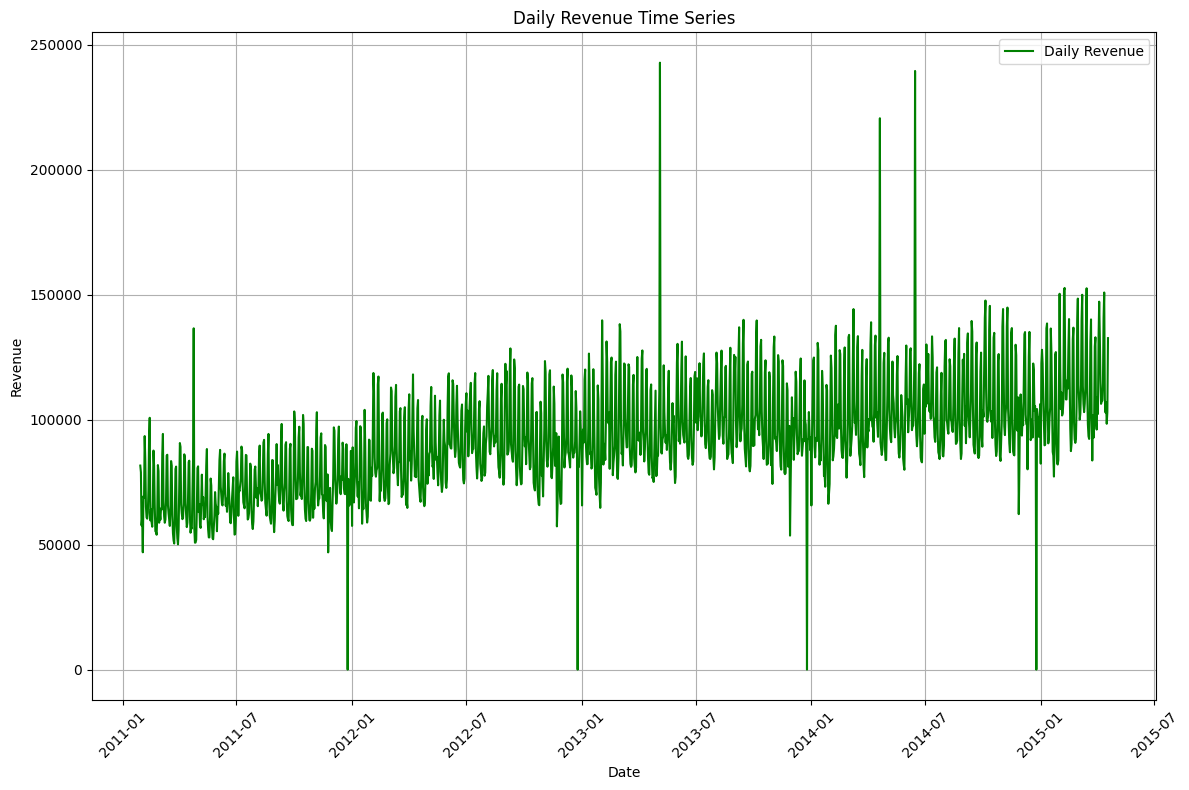

In [21]:
# daily_revenue.plot()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
ax.plot(daily_revenue['date'], daily_revenue['revenue'], label='Daily Revenue', color='g')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.set_title('Daily Revenue Time Series')

# Add gridlines
ax.grid(True)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
daily_revenue = daily_revenue.set_index('date')

### Check For Stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ", dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [24]:
adf_test(daily_revenue['revenue'])

1. ADF :  -1.868247678553163
2. P-Value :  0.34714261537650515
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1516
5. Critical Values :
	 1% :  -3.434670849024842
	 5% :  -2.863448384101514
	 10% :  -2.5677859979567117


### Figure Out Order for ARIMA Model

In [25]:
stepwise_fit = auto_arima(daily_revenue['revenue'], trace=True, suppress_warnings=True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33826.342, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34594.095, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34595.689, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34595.310, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34592.101, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33976.349, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=33682.593, Time=1.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=33925.419, Time=0.30 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=33289.841, Time=1.85 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=33802.061, Time=0.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=33160.035, Time=2.02 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=33478.929, Time=0.83 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=33163.551, Time=2.80 sec
 ARIMA(4,1,3)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1541
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -16571.017
Date:                Mon, 09 Oct 2023   AIC                          33160.035
Time:                        14:14:55   BIC                          33208.091
Sample:                    01-29-2011   HQIC                         33177.914
                         - 04-18-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    153.7463    243.530      0.631      0.528    -323.564     631.057
ar.L1          0.4842      0.017     28.170      0.000       0.450       0.518
ar.L2         -0.7257      0.022    -32.346      0.000      -0.770      -0.682
ar.L3         -0.2195      0.021    -10.513      0.000      -0.260      -0.179
ar.L4         -0.2973      0.017    -17.815      0.000      -0.330      -0.265
ar.L5         -0.3018      0.021    -14.381      0.000      -0.343      -0.261
ma.L1         -1.1945      0.011   -109.129      0.000      -1.216      -1.173
ma.L2          0.9320      0.011     82.100      0.000       0.910       0.954
sigma2      1.406e+08      0.002   7.16e+10      0.000    1.41e+08    1.41e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):             49020.54
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+26. Standard errors may be unstable.
"""

## Train-Validation Split

In [26]:
val_size = 28

print(daily_revenue.shape)
train=daily_revenue.iloc[:-val_size]
val=daily_revenue.iloc[-val_size:]
print(train.shape,val.shape)
print(val.iloc[0],val.iloc[-1])

(1541, 1)
(1513, 1) (28, 1)
revenue    140114.22
Name: 2015-03-22 00:00:00, dtype: float64 revenue    132625.89
Name: 2015-04-18 00:00:00, dtype: float64


### Train the model

In [27]:
# For non-seasonal data
#p=5, d=1, q=2
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model = ARIMA(train['revenue'],order=(5,1,2))

model_fit=model.fit()


/Users/sareem/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-Q3KKzzDn-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sareem/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-Q3KKzzDn-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sareem/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-Q3KKzzDn-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sareem/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-Q3KKzzDn-py3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                revenue   No. Observations:                 1513
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -16279.344
Date:                Mon, 09 Oct 2023   AIC                          32574.687
Time:                        14:14:57   BIC                          32617.257
Sample:                    01-29-2011   HQIC                         32590.540
                         - 03-21-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5110      0.016     31.044      0.000       0.479       0.543
ar.L2         -0.7426      0.023    -32.881      0.000      -0.787      -0.698
ar.L3         -0.1967      0.021     -9.591      0.000      -0.237      -0.156
ar.L4         -0.2997      0.017    -18.135      0.000      -0.332      -0.267
ar.L5         -0.2858      0.021    -13.566      0.000      -0.327      -0.245
ma.L1         -1.1987      0.010   -118.209      0.000      -1.219      -1.179
ma.L2          0.9452      0.011     86.910      0.000       0.924       0.966
sigma2      1.414e+08   5.75e-11   2.46e+18      0.000    1.41e+08    1.41e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             48028.52
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+34. Standard errors may be unstable.
"""

## Final training

In [30]:
start_train=0
end_train=len(train)-1

start_val=len(train)
end_val=len(train)+len(val)-1

pred_val=model_fit.predict(start=start_val,end=end_val,typ='levels').rename('predicted revenue')
pred_train=model_fit.predict(start=start_train,end=end_train,typ='levels').rename('predicted revenue')


<Axes: xlabel='date'>

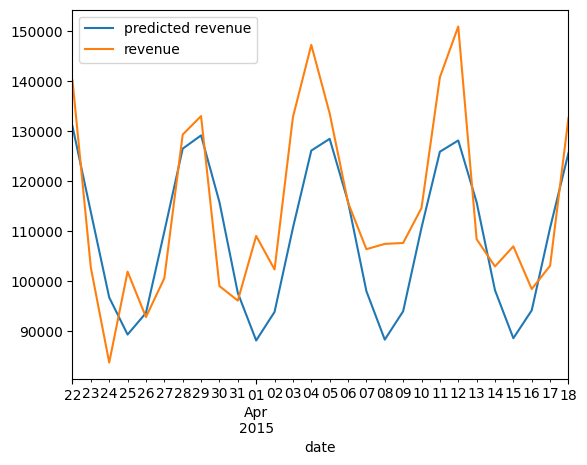

In [31]:
# Plot for validation
pred_val.plot(legend=True)
val['revenue'].plot(legend=True)

## Metric evaluation

In [32]:
train['revenue'].mean()

92288.90761401191

In [33]:
val['revenue'].mean()

114249.00964285716

In [34]:
# Calculate RSME for train
rmse=np.sqrt(mean_squared_error(train['revenue'],pred_train))
print(rmse)

11651.056765442472


In [35]:
# Calculate RSME for validation
rmse=np.sqrt(mean_squared_error(val['revenue'],pred_val))
print(rmse)

12426.30662788609


In [36]:
arima_model_final=ARIMA(daily_revenue['revenue'],order=(5,1,2))
arima_model_final = arima_model_final.fit()

/Users/sareem/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-Q3KKzzDn-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sareem/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-Q3KKzzDn-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sareem/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-Q3KKzzDn-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sareem/Library/Caches/pypoetry/virtualenvs/adv-mla-at2-Q3KKzzDn-py3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to c

In [37]:
dump(arima_model_final, '../../models/forecasting/arima_model.joblib')

['../../models/forecasting/arima_model.joblib']

In [38]:
daily_revenue.tail()

,revenue
date,
2015-04-14,102896.92
2015-04-15,106913.88
2015-04-16,98373.49
2015-04-17,103030.58
2015-04-18,132625.89


In [39]:
# Next 7 days prediction function:
def predict_7_days(start_date, arima_model):
    # Create a date range for the next 7 days
    future_date_index = pd.date_range(start=start_date, periods=7)

    # Make predictions for the next 7 days
    pred = arima_model.predict(start=len(arima_model.fittedvalues), end=len(arima_model.fittedvalues) + 6, typ='levels').rename('ARIMA Predictions')

    # Create a dictionary of predictions in the desired format
    predictions_dict = {date.strftime('%d/%m/%Y'): value for date, value in zip(future_date_index, pred)}

    return predictions_dict


In [40]:
# Next 7 days predictions:
start_date = pd.to_datetime('2015-04-18')

In [41]:
predictions = predict_7_days(start_date, arima_model_final)
predictions

{'18/04/2015': 132622.08449746677,
 '19/04/2015': 111373.22912991818,
 '20/04/2015': 96258.65725403011,
 '21/04/2015': 93919.01558458323,
 '22/04/2015': 99341.20621561611,
 '23/04/2015': 113385.24067666868,
 '24/04/2015': 127660.26078275978}